#Mouafak Alsaid Hasan
##homework-05
##Decision Tree Regression

##Library import

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import math

##Importing Data from the Homework File

In [36]:
size = 134
data = np.genfromtxt("hw04_data_set.csv", delimiter=",")[1:size, 0]
labels = np.genfromtxt("hw04_data_set.csv", delimiter=",")[1:size, 1]
training_inputs,training_labels, test_labels, test_inputs = [], [],[], []


for i in range(size - 1): 
  if i < 100:
    training_inputs.append(data[i]) 
    training_labels.append(labels[i])
  else:
    test_inputs.append(data[i]) 
    test_labels.append(labels[i])  

training_inputs, training_labels = np.array(training_inputs), np.array(training_labels)
test_inputs, test_labels = np.array(test_inputs), np.array(test_labels)

test = [0,3,5,4]
print(training_inputs[test])


[24.  31.2 15.6 13.8]


##Decision Tree Regression Algorithm

##Learning Process

In [37]:
# learning algorithm
def learn_decsion_tree(X, Y, p, node_indices, is_terminal, need_split, node_features, node_splits, node_frequencies):
  while True:
    # find nodes that need splitting
    split_nodes = [key for key, value in need_split.items() if value == True]
    # check whether we reach all terminal nodes
    if len(split_nodes) == 0:
        break
    # find best split positions for all nodes
    for split_node in split_nodes:
        data_indices = node_indices[split_node]
        need_split[split_node] = False
        node_frequencies[split_node] = np.mean([Y[i] for i in data_indices])

        if len(data_indices) <= p:
            is_terminal[split_node] = True
        else:
            is_terminal[split_node] = False
         
            unique_values = np.sort(np.unique(X[data_indices]))
            split_positions = (unique_values[1:len(unique_values)] + unique_values[0:(len(unique_values) - 1)]) / 2
            split_scores = np.repeat(0.0, len(split_positions))
            for s in range(len(split_positions)):
                left_indices = data_indices[X[data_indices] < split_positions[s]]
                right_indices = data_indices[X[data_indices] >= split_positions[s]]
                split_scores[s] = (1/len(data_indices)) * ( np.sum([(Y[left_indices] - np.mean(Y[left_indices]))**2]) + np.sum([(Y[right_indices] - np.mean(Y[right_indices]))**2]))

            best_score = np.min(split_scores)
            best_split = split_positions[np.argmin(split_scores)]

            # decide where to split on which feature
            node_features[split_node] = np.argmin(best_score)
            node_splits[split_node] = best_split
            
            # create left node using the selected split
            left_indices = data_indices[X[data_indices] < best_split]
            node_indices[2 * split_node] = left_indices
            is_terminal[2 * split_node] = False
            need_split[2 * split_node] = True
      
            # create right node using the selected split
            right_indices = data_indices[X[data_indices] >= best_split]
            node_indices[2 * split_node + 1] = right_indices
            is_terminal[2 * split_node + 1] = False
            need_split[2 * split_node + 1] = True

  return  node_indices, is_terminal, need_split, node_features, node_splits, node_frequencies  

    



##Extending the learning process to mutiple values of pre-pruning parameter.

In [38]:
P_values = [(5 * i + 5) for i in range(10)]
# create necessary data structures
node_indices_lists, is_terminal_lists, need_split_lists = [], [], []
node_features_lists, node_splits_lists, node_frequencies_lists = [], [], []

for i in range(len(P_values)):
  node_indices, is_terminal, need_split = {}, {}, {}
  node_features, node_splits, node_frequencies = {},{},{}
  node_indices[1] = np.array(range(100))
  is_terminal[1] = False
  need_split[1] = True
  node_indices, is_terminal, need_split, node_features, node_splits, node_frequencies = learn_decsion_tree(training_inputs, training_labels, P_values[i], node_indices, is_terminal, need_split, node_features, node_splits, node_frequencies )
  node_indices_lists.append(node_indices)
  is_terminal_lists.append(is_terminal)
  need_split_lists.append(need_split)
  node_features_lists.append(node_features)
  node_splits_lists.append(node_splits)
  node_frequencies_lists.append(node_frequencies)


node_indices_lists, is_terminal_lists, need_split_lists = np.array(node_indices_lists), np.array(is_terminal_lists), np.array(need_split_lists)
node_features_lists, node_splits_lists, node_frequencies_lists = np.array(node_features_lists), np.array(node_splits_lists), np.array(node_frequencies_lists)

##Prediction Function

In [39]:
def predict(X, terminals, frequences, splits):
    scores = np.zeros(len(X))
    for i in range(len(X)):
        j = 1
        while True:
            if terminals[j]:
                scores[i] = frequences[j]
                break
            else:
                if X[i] <= splits[j]:
                    j = 2 * j
                else:
                    j = 2 * j + 1
    return scores

##plotting The Decsion Tree

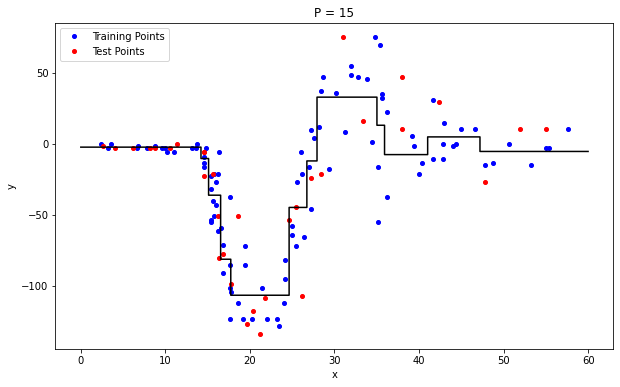

In [40]:
minimum_value = 0
maximum_value = 60
data_interval = np.linspace(minimum_value, maximum_value, 1601)
y_predicted = predict(data_interval, is_terminal_lists[2], node_frequencies_lists[2], node_splits_lists[2])

#Plotting the regressogram and the data points
plt.figure(figsize=(10,6))
plt.plot(training_inputs, training_labels, "b.", markersize= 8, label='Training Points', color ='Blue')
plt.plot(test_inputs, test_labels, "r.", markersize= 8, label= 'Test Points', color = 'Red')
plt.step(data_interval, y_predicted, where='post', color='black')
plt.ylabel('y')
plt.xlabel('x')
plt.title(label = ("P = " + str(P_values[2])))
plt.legend(loc = 'upper left')
plt.show()
plt.show()

##The Root Mean Squared Error (RMSE) 

In [41]:
def RMSE(Y_truth, Y_predicted):
  sum = 0.0
  K = len(Y_truth)
  for i in range(K):
    sum += (Y_truth[i] - Y_predicted[i]) ** 2
  return np.sqrt(sum/K)

y_pr = predict(test_inputs, is_terminal_lists[2], node_frequencies_lists[2], node_splits_lists[2])
tree_error = RMSE(test_labels, y_pr)
print("RMSE is ", tree_error, "When P is ", P_values[2])

RMSE is  26.87765508724891 When P is  15


##RMSE As A Function of P

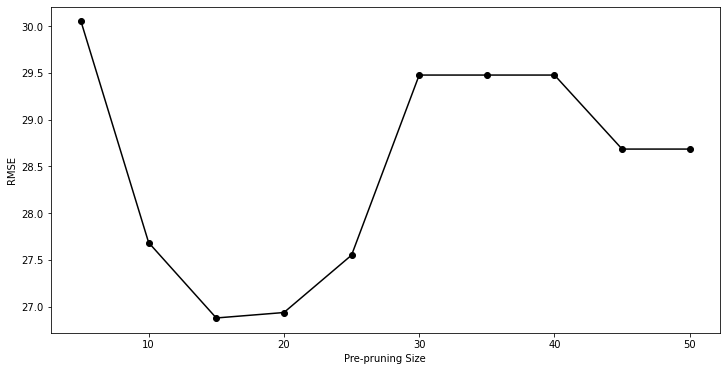

In [54]:
RMSE_VALUES = []
for i in range(len(P_values)):
  scores = predict(test_inputs, is_terminal_lists[i], node_frequencies_lists[i], node_splits_lists[i])
  RMSE_VALUES.append(RMSE(test_labels, scores))

#Plotting the regressogram and the data points
min_p_value = np.min(P_values)
max_p_value = np.max(P_values)
plt.figure(figsize=(12,6))
plt.plot(P_values, RMSE_VALUES, marker= 'o', color ='black')
plt.ylabel('RMSE')
plt.xlabel('Pre-pruning Size')
plt.show()
plt.show()